Выполнение тестирования "Задача по анализу поиска в Яндекс Картинках"

In [95]:
import pandas as pd 
import pandasql as psql
from datetime import datetime
import matplotlib.pyplot as plt

Изначально возьмем первые 5 строк данных и посмотрим что в них есть

In [96]:
predf = pd.read_csv('data.tsv', sep='\t', header=None)
predf.head()

,0,1,2
0,порно фото,1631786697,touch
1,малевич картины,1631806465,desktop
2,Секс,1631781583,touch
3,с днём рождения лена,1631771563,touch
4,зверополис порно,1631787599,touch


Можно увидеть, что в данных предоставляется сам запрос, дата в формате timestamp и платформа с которой был сделан запрос.

Изначально в данных нет названия столбцов, поэтому выявих их примерные названия, даём имена столбцам сами, что бы после понятно работать с данными.

In [97]:
df = pd.read_csv('data.tsv', sep='\t', header=None, names=['Запрос', 'Дата', 'Платформа'])

Теперь напишем функцию для работы с данными (sql-скриптами) с помощью pandasql.sqldf (было в условиях задания).

In [98]:
def execute_sql(query):
    return psql.sqldf(query, env={'search_data': df})

Первое задание - "Укажите даты диапазона предоставленного вам для анализа"

Для этого возьмем минимальную и максимальную даты из данных и преобразуем их в понятный для чтения формат.

In [99]:
query_1 = """
SELECT 
    datetime(MIN(Дата), 'unixepoch') as Начальная_дата,
    datetime(MAX(Дата), 'unixepoch') as Конечная_дата
FROM search_data
"""

result_1 = execute_sql(query_1)
result_1.head()

,Начальная_дата,Конечная_дата
0,2021-08-31 21:00:00,2021-09-21 20:59:59


Т.е. для анализа были предоставлены данные с 31.08.2021 по 21.09.2021

Второе задание - "Рассчитайте кол-во запросов с текстом "ютуб"  в каждой платформе (desktop, touch)"

В запросе указываем оконную функцию 'count', по всем запросам, где в запросе используется текст "ютуб", и сгрупируем по платформам.

In [100]:
query_2 = """
SELECT 
    Платформа,
    COUNT(*) as Количество_запросов
FROM search_data
WHERE LOWER(Запрос) LIKE '%ютуб%'
GROUP BY Платформа
ORDER BY Количество_запросов DESC
"""

result_2 = execute_sql(query_2)
result_2.head()


,Платформа,Количество_запросов
0,desktop,802
1,touch,597


Можно увидеть, что на desktop количество запросов ровнялось 802, а на touch - 597.

Третье задание - "Выведите топ10 самых частотных запросов в каждой платформе (desktop, touch). Какие отличия вы видите?"

Для этого задания создадим почти одинаковые запросы, только поменяем там название платформы.
В запросе считается количество и групируется по запросу.

In [101]:
query_3_desktop = """
SELECT 
    Запрос,
    COUNT(*) as частота
FROM search_data
WHERE Платформа = 'desktop'
GROUP BY Запрос
ORDER BY частота DESC
LIMIT 10
"""

query_3_touch = """
SELECT 
    Запрос,
    COUNT(*) as частота
FROM search_data
WHERE Платформа = 'touch'
GROUP BY Запрос
ORDER BY частота DESC
LIMIT 10
"""

Посмотрим сначала для desktop:

In [102]:
print("Топ 10 для desktop:")
result_3_desktop = execute_sql(query_3_desktop)
result_3_desktop.head(10)

Топ 10 для desktop:


,Запрос,частота
0,календарь 2021,2804
1,таблица менделеева,2631
2,картинки,1647
3,порно,1342
4,английский алфавит,1293
5,обои на рабочий стол,1143
6,Одноклассники (социальная сеть),1116
7,секс,895
8,таблица квадратов,877
9,алфавит,874


Первое место - календарь 21 года (Как мы раньше выяснили, запросы 2021 года) с количеством в 2804 запроса, второе - таблица менделеева с 2631 запросом, третье картинки с 1647 запросами.

Теперь рассмотрим для touch-устройств:

In [103]:
print("Топ 10 для touch:")
result_3_touch = execute_sql(query_3_touch)
result_3_touch.head(10)

Топ 10 для touch:


,Запрос,частота
0,порно,7740
1,секс,6348
2,с днём рождения женщине,4903
3,с днём рождения,3967
4,с днём рождения мужчине,3623
5,хентай,3157
6,с днем рождения,3005
7,xxx,2429
8,Порно,2330
9,календарь 2021,2237


Как видно, запросы очень отличаются от desktop-запросов, но есть и сходства, например календарь 2021, он стоит на desktop на первом месте, а в touch находится на 10-м месте. Можно сказать, что топ 10 запросов на desktop-устройствах очень различается от топ 10-ти запросов на touch-устройствах, совпадение - 3\10

Четвёртое задание - "Посмотрите, чем отличается трафик запросов в течении дня. Как можно объяснить отличие?"

Для этого напишем sql-запрос, который изначально переведёт дату в читабельный вид и извлечёт из неё часы, после посчитает количество запросов, сгруппирует по часу.

In [104]:
query_4 = """
SELECT 
    Платформа,
    strftime('%H', datetime(Дата, 'unixepoch')) as Час,
    COUNT(*) as Количество_запросов
FROM search_data
GROUP BY Платформа, Час
ORDER BY Платформа, Час
"""

result_4 = execute_sql(query_4)
result_4.head(48)

,Платформа,Час,Количество_запросов
0,desktop,00,2396
1,desktop,01,3023
2,desktop,02,4224
3,desktop,03,6510
4,desktop,04,9863
5,desktop,05,14674
6,desktop,06,19423
7,desktop,07,21791
8,desktop,08,23314
9,desktop,09,24644


Для наглядности построим график с помощью matplotlib, который линейно покажет данные и добавим подписи к каждой точке. 

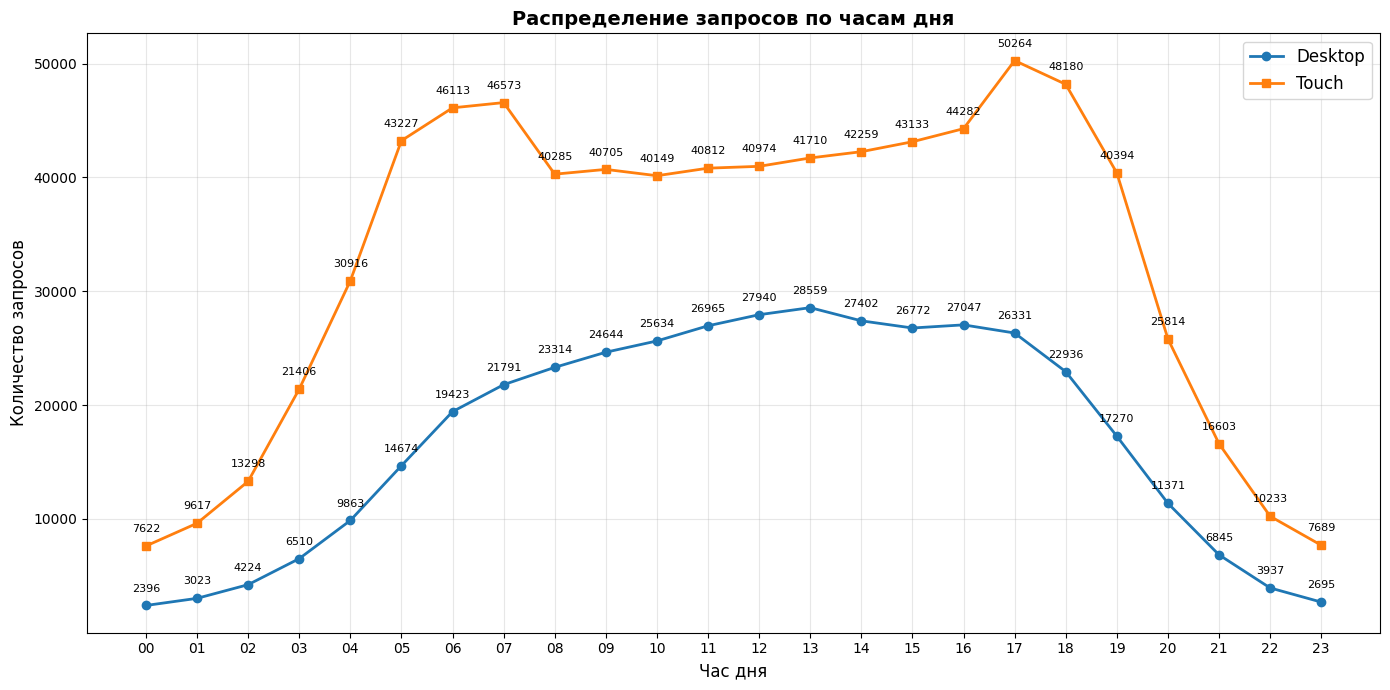

In [105]:
pivot_result = result_4.pivot(index='Час', columns='Платформа', values='Количество_запросов')

plt.figure(figsize=(14, 7))
line1 = plt.plot(pivot_result.index, pivot_result['desktop'], marker='o', label='Desktop', linewidth=2)
line2 = plt.plot(pivot_result.index, pivot_result['touch'], marker='s', label='Touch', linewidth=2)

for i, (hour, desktop_count, touch_count) in enumerate(zip(pivot_result.index, pivot_result['desktop'], pivot_result['touch'])):
    plt.annotate(f'{desktop_count}', (hour, desktop_count), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    plt.annotate(f'{touch_count}', (hour, touch_count), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.title('Распределение запросов по часам дня', fontsize=14, fontweight='bold')
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Количество запросов', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

И теперь можно проанализировать:
На desktop-устройствах количество запросов увеличивается с каждым часов до 13 часов, после остаётся примерно на одном уровне в промежутке от 14 до 17 часов, после уменьшается с каждым часов.
На touch-устройствах ситуация другая, изначально количество запросов повышается до 7-ми утра, а после, в промежутке от 8 до 16 держится примерно на одном уровне, после график уходит вверх на 17-ти часах, получая пиковое значение и постепенно снижается.

Пиковые значения у desktop-устройств это 28559 запросов, достигло на 13-м часу, у touch-устройств пиковое значение - 50264, достигло на 17-ти часах.

Проанализировав этот график, можно предположить, почему он именно такой:
1. Можно увидеть, как touch-устройства сильно доминируют над desktop-устройствами, это связанно с тем, что touch-устройства, такие как например телефон, находятся всегда под рукой, так же их можно спокойно использовать в очередях или в транспорте.
2. График на desktop-устройствах стабильный, пик у него происходит примерно в середине рабочего дня, а уходит на спад после окончания рабочего дня, в этот же момент происходит спад и держание на одном уровне запросов на мобильных устройствах.
3. После окончания рабочего дня, пик обратно приходит на touch-устройства (люди отдыхают\едут домой), а desktop-устройства уходят на спад.

Т.е. можно сделать вывод, что пик desktop-устройств происходит в рабочее время, а touch-устройств в момент поездки на работу и с работы.

Пятое задание - "Выделите тематики запросов, контрастные для мобильных и компьютеров - темы, доля которых отличаются на разных платформах"

Что бы выделить тематики запросов для этого задания, я решил взять топ 10 запросов на каждом устройстве и выделить из них самые популярные группы.
Проблема в этом задании возникает, что абсолютно все запросы (если их очень много) разделить на группы невозможно без использования llm, поэтому для тестового задания я решил взять только самые наглядные группы и запросы.

В запросе разные слова, которые могут фигурировать в запросах, разделяются на свои группы:
1. Взрослый контент
2. Поздравления
3. Календарь
4. Изображения
5. Образование
6. Соцсети

После высчитывается общее количество запросов для каждой из групп, высчитывается доля процентов на каждом из типов устройств и вычисляется разница между платформами.

In [106]:
query_5 = """
WITH categorized_queries AS (
    SELECT 
        Запрос,
        Платформа,
        CASE 
            WHEN LOWER(Запрос) LIKE '%порн%' OR LOWER(Запрос) LIKE '%секс%' 
                 OR LOWER(Запрос) LIKE '%хент%' OR LOWER(Запрос) LIKE '%xxx%' THEN 'взрослый_контент'

            WHEN LOWER(Запрос) LIKE '%днём рожден%' OR LOWER(Запрос) LIKE '%днем рожден%' THEN 'поздравления'
            
            WHEN LOWER(Запрос) LIKE '%календар%' THEN 'календарь'
            
            WHEN LOWER(Запрос) LIKE '%картин%' OR LOWER(Запрос) LIKE '%обои на%' THEN 'изображения'
            
            WHEN LOWER(Запрос) LIKE '%таблиц%' OR LOWER(Запрос) LIKE '%алфавит%' 
                 OR LOWER(Запрос) LIKE '%менделеев%' THEN 'образование'
            
            WHEN LOWER(Запрос) LIKE '%одноклассник%' OR LOWER(Запрос) LIKE '%вк%' THEN 'соцсети'
            
            ELSE 'другое'
        END as тематика
    FROM search_data
),
platform_totals AS (
    SELECT 
        Платформа,
        COUNT(*) as общее_количество
    FROM search_data
    GROUP BY Платформа
),
thematic_counts AS (
    SELECT 
        c.Платформа,
        c.тематика,
        COUNT(*) as количество,
        pt.общее_количество
    FROM categorized_queries c
    JOIN platform_totals pt ON c.Платформа = pt.Платформа
    GROUP BY c.Платформа, c.тематика
),
thematic_shares AS (
    SELECT 
        Платформа,
        тематика,
        количество,
        ROUND(CAST(количество as REAL) / общее_количество * 100, 2) as доля_процентов
    FROM thematic_counts
)
SELECT 
    тематика,
    SUM(CASE WHEN Платформа = 'desktop' THEN доля_процентов ELSE 0 END) as desktop_доля,
    SUM(CASE WHEN Платформа = 'touch' THEN доля_процентов ELSE 0 END) as touch_доля,
    ABS(SUM(CASE WHEN Платформа = 'desktop' THEN доля_процентов ELSE 0 END) - 
        SUM(CASE WHEN Платформа = 'touch' THEN доля_процентов ELSE 0 END)) as разница
FROM thematic_shares
GROUP BY тематика
ORDER BY разница DESC
"""

result_5 = execute_sql(query_5)
print("Тематики с наибольшей разницей в долях между платформами:")
result_5.head(10)

Тематики с наибольшей разницей в долях между платформами:


,тематика,desktop_доля,touch_доля,разница
0,другое,86.47,79.90,6.57
1,поздравления,1.36,6.99,5.63
2,взрослый_контент,1.84,6.15,4.31
3,образование,3.72,1.70,2.02
4,календарь,2.38,0.82,1.56
5,изображения,3.27,3.82,0.55
6,соцсети,0.97,0.63,0.34


Конечно можно увидеть, как чуть меньше 90% улетело в группу Другое, это связано с тем, что я не до конца провожу группировку абсолютно всех возможных запросов по словам, но основные категории так же можно проанализировать.

Наибольшая разница происходит на группе "поздравления", составляет 5.63 процента, больше всего поздравления ищут на touch-устройствах, это скорее всего связано с возможностью быстро его найти в нужный момент, сохранить что бы оно всегда было под рукой и удобно прочитать его.

Наименьшая разница, если не брать в расчёт соцсети (там сликом маленький процент впринципе), будет у изображений - 0.55 процента, это связанно с тем, что люди почти одинаково нуждаются в картинках что на desktop-устройствах, что на touch-устройствах.